# Histogramas en Python

## Histogramas en Python puro

In [1]:
x = (0,1,1,1,2,2,3,7,7,7,25)

In [2]:
def count_elements(seq) -> dict:
    """
    Función que cuenta las frecuencias
    de aparición de cada elemento de la
    secuencia, creando un diccionario como
    si fuese una tabla de frecuencias
    """
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

In [3]:
fAbs = count_elements(x)

In [4]:
fAbs

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

In [5]:
from collections import Counter

In [6]:
fAbs2 = Counter(x)

In [7]:
fAbs2

Counter({0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1})

In [8]:
fAbs.items() == fAbs2.items()

True

In [9]:
def ascii_histogram(seq) -> None:
    """
    Un histograma de frecuencias absolutas
    colocado en horizontal y con caracteres ASCII
    """
    fAbs = count_elements(seq)
    for k in sorted(fAbs):
        print('{0:5d} {1}'.format(k, '+'*fAbs[k]))

In [10]:
ascii_histogram(x)

    0 +
    1 +++
    2 ++
    3 +
    7 +++
   25 +


In [11]:
import random
random.seed(2019)

In [12]:
vals = [1,2,3,5,7,8,9,10]
freqs = (random.randint(5,20) for _ in vals)

In [13]:
data = []
for k, v in zip(vals, freqs):
    data.extend([k]*v)

In [14]:
ascii_histogram(data)

    1 +++++++++
    2 ++++++++++++
    3 ++++++++++++++++++++
    5 ++++++++++
    7 ++++++++++++
    8 ++++++++++++
    9 +++++++++++++++
   10 ++++++++++++++


## Histogramas con NumPy

In [15]:
import numpy as np

In [16]:
np.random.seed(2019)

In [17]:
np.set_printoptions(precision=3)

In [18]:
x = np.random.laplace(loc=10, scale=3, size=1000)

In [19]:
x[:10]

array([14.935,  9.278, 10.855, 10.968, 14.294,  8.459, 11.555, 14.926,
       14.316,  9.373])

In [20]:
hist, bin_edges = np.histogram(x)

In [21]:
hist

array([  1,   0,   0,   8,  48, 194, 542, 167,  31,   9], dtype=int64)

In [22]:
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [23]:
hist.size, bin_edges.size

(10, 11)

In [24]:
min_edge = x.min()
max_edge = x.max()

In [25]:
n_bins = 10
bin_edges = np.linspace(start=min_edge, stop=max_edge, num=n_bins+1, endpoint=True)

In [26]:
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [27]:
x = (0,1,1,1,2,2,3,7,7,7,25)

In [28]:
bcount = np.bincount(x)
bcount

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [30]:
hist, _ = np.histogram(x, range=(0, max(x)), bins = max(x)+1)

In [32]:
hist

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [31]:
np.array_equal(bcount, hist)

True

In [33]:
dict(zip(np.unique(x), bcount[bcount.nonzero()]))

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

### Visualización de histogramas con matplotlib y Pandas 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
np.random.seed(2019)
x = np.random.laplace(loc=10, scale=3, size=1000)

(0.0, 140.0)

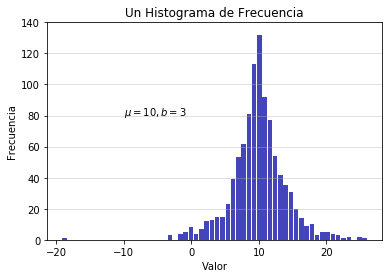

In [10]:
n, bins, patches = plt.hist(x = x, bins="auto", color = "#0505a5", alpha =0.75, rwidth = 0.85)
plt.grid(axis = "y", alpha=0.5)
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Un Histograma de Frecuencia")
plt.text(-10,80, r'$\mu = 10, b = 3$')
maxfreq=n.max()
plt.ylim(ymax = np.ceil(maxfreq/10)*10 if maxfreq%10 else maxfreq + 10 )

In [8]:
n

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
         4.,   5.,   8.,   4.,   7.,  12.,  13.,  15.,  15.,  23.,  39.,
        53.,  62.,  81., 113., 132.,  92.,  77.,  54.,  42.,  35.,  31.,
        20.,  14.,   9.,  10.,   3.,   5.,   5.,   4.,   3.,   1.,   2.,
         0.,   2.,   1.])

In [9]:
patches

<a list of 58 Patch objects>

In [11]:
size, scale = 1000 , 10
data = pd.Series(np.random.gamma(scale, size = size))

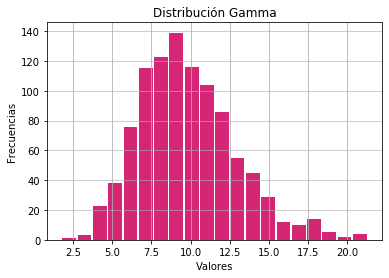

In [14]:
data.plot.hist(grid = True, bins = 20, rwidth = 0.9, color = "#d52675")
plt.title("Distribución Gamma")
plt.xlabel("Valores")
plt.ylabel("Frecuencias")
plt.grid(axis = "y", alpha =0.75)

## Funciones de densidad y de probabilidad

In [23]:
mu = 10, 20
sigma = 5, 2
dist = pd.DataFrame(np.random.normal(loc= mu, scale=sigma, size=(1000, 2)), columns = ['x1','x2']) 

In [20]:
dist.agg(['min', 'max','mean', 'std']).round(decimals = 2)

,x1,x2
min,-8.70,13.90
max,25.05,25.82
mean,10.33,20.05
std,4.73,1.98


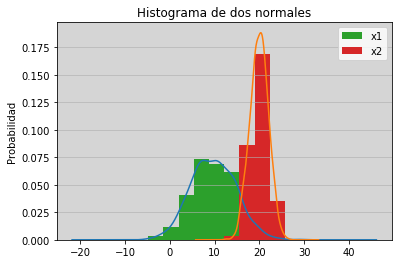

In [26]:
fig, ax = plt.subplots()
dist.plot.kde(ax = ax, legend = False, title = "Histograma de dos normales")
dist.plot.hist(density = True, ax = ax)
ax.set_ylabel("Probabilidad")
ax.grid(axis="y", alpha = 0.75)
ax.set_facecolor("#d5d5d5")

In [ ]:
# otra prueba